In [1]:
import cv2
import numpy as np

In [2]:
from PIL import Image

In [3]:
from matplotlib import pyplot as plt

## Select video file

In [4]:
# Opens the Video file
#cap= cv2.VideoCapture('video.mkv')
cap= cv2.VideoCapture('Systems Design.mp4')

## Select processed area

In [5]:
ret, frame = cap.read()

In [6]:
ret, frame_tmp = cap.read()

In [7]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [8]:
# view image dimensions
height_pix, width_pix, _ = frame.shape
height_pix, width_pix

(1080, 1920)

In [9]:
# Select area to test for updated content
# The right part can contain the speaker that need to be ignored
# Considering only the bottom area can be important if the slide is filled with content gradually
bottom_down_percent = 70
ignore_left_percent = 15
ignore_right_percent = 30

In [10]:
sv = slice(-int(bottom_down_percent*height_pix/100),-1)
sh = slice(int(ignore_left_percent*width_pix/100),-int(ignore_right_percent*width_pix/100))

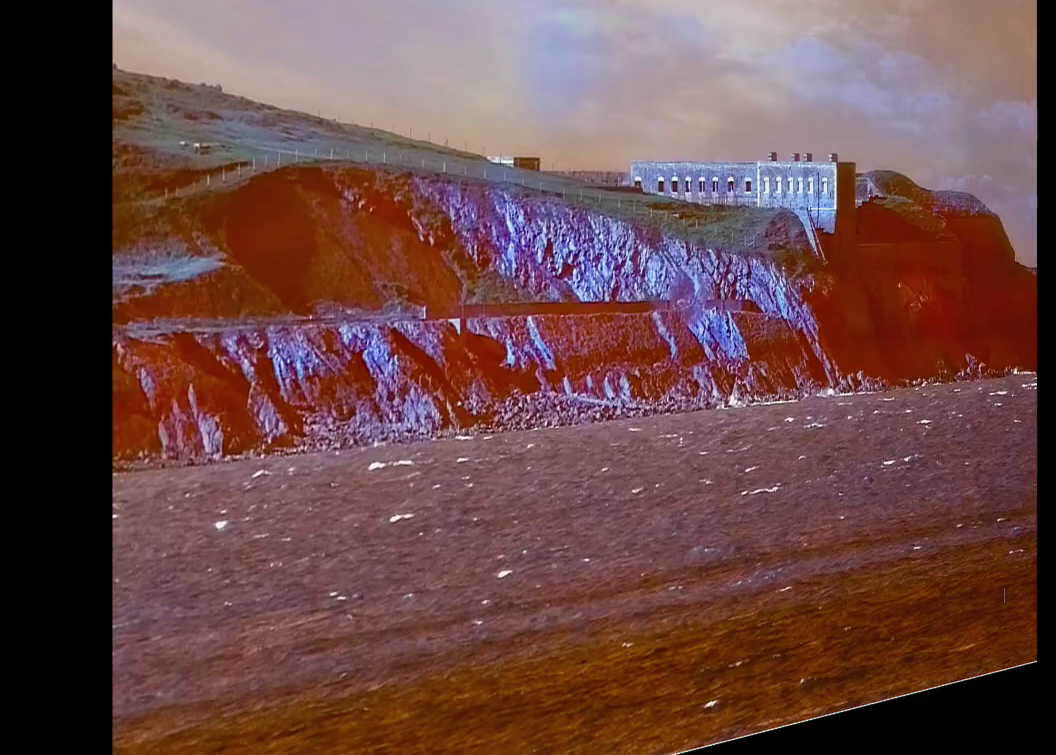

In [11]:
Image.fromarray(frame[sv,sh,:])

In [12]:
#plt.imshow(frame[sv,sh,:])

In [13]:
# Select area to test for invariable content
# The slide transitions should be skipped
# Can contain the whole frame without the speaker
ignore_top_percent = 1
ignore_bottom_percent = 1
ignore_left_percent = 10
ignore_right_percent = 10

In [14]:
sv2 = slice(int(ignore_top_percent*height_pix/100),-int(ignore_bottom_percent*height_pix/100), 1)
sh2 = slice(int(ignore_left_percent*width_pix/100),-int(ignore_right_percent*width_pix/100), 1)
sv2, sh2

(slice(10, -10, 1), slice(192, -192, 1))

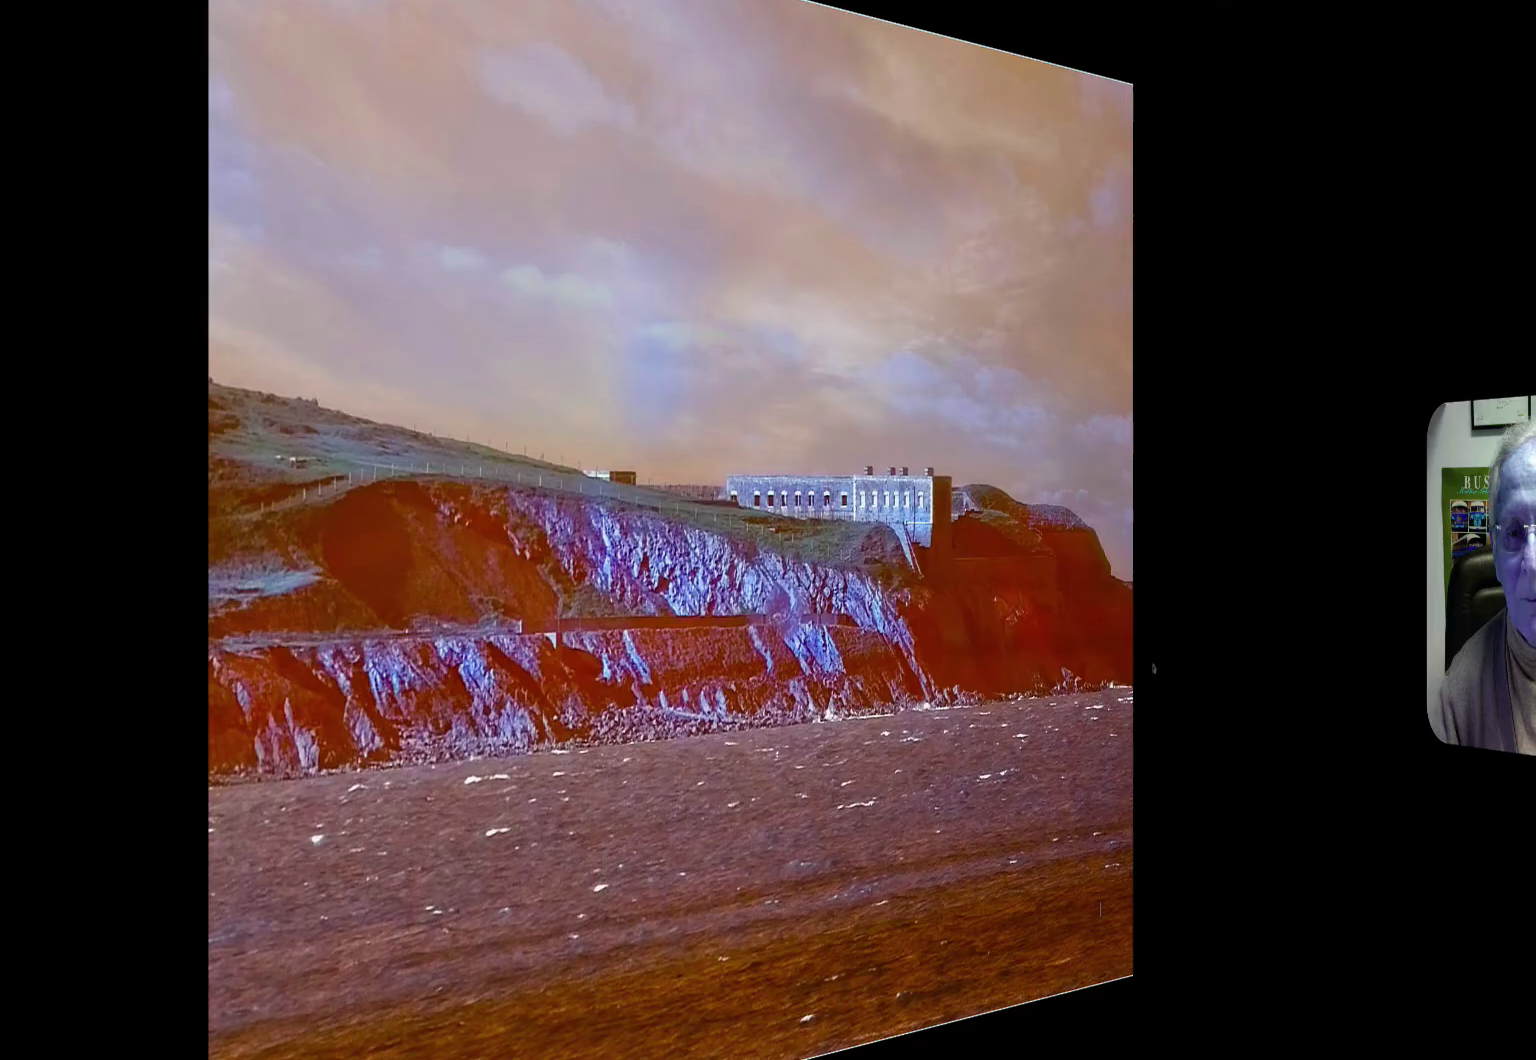

In [15]:
Image.fromarray(frame[sv2,sh2,:])

## Select sensitivity

In [17]:
# Adjust thresholds manually for acceptable performance
diff_threshold = 10 # higher require bigger difference in order to consider new slide (20) and less slides
transition_threshold = 0.003 # lower will guarantee excluding transition images (0.03) and less slides

## Extract images

In [16]:
# !! This will delete all jpg images from previous tests
!rm -rf *.jpg

In [18]:
i=0
k=0
diff_list = []
diff_prev_list = []
while(cap.isOpened()):    
    ret, frame2 = cap.read()
    k+=1
    if ret == False:
        break
    if k%5==0:        
        diff = ((frame2[sv,sh,:] - frame[sv,sh,:])*(frame2[sv,sh,:] - frame[sv,sh,:])).mean()
        diff_prev = ((frame2[sv2,sh2,:] - frame_tmp[sv2,sh2,:])*(frame2[sv2,sh2,:] - frame_tmp[sv2,sh2,:])).mean()
        diff_list.append(diff)
        diff_prev_list.append(diff_prev)
        if (diff > diff_threshold) and (diff_prev < transition_threshold):
            cv2.imwrite(f"slide_{i:03d}_{diff:.0f}.jpg",frame2)
            frame = frame2
            i+=1
    frame_tmp = frame2
 
cap.release()
cv2.destroyAllWindows()

## Explore and adjust parameters

In [19]:
diff_array = np.array(diff_list)
diff_prev_array = np.array(diff_prev_list)

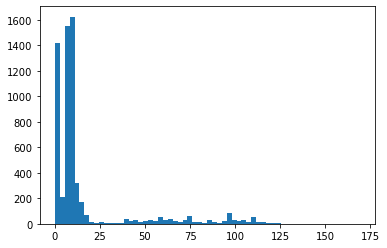

In [20]:
hist = plt.hist(diff_array,bins = int(len(diff_array)/100), histtype='stepfilled')

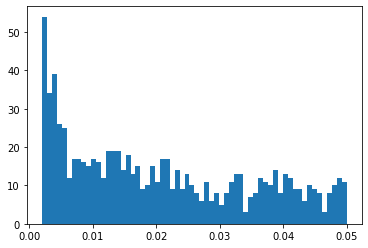

In [28]:
hist = plt.hist(diff_prev_array,bins = int(len(diff_array)/100), histtype='stepfilled', range=[0.002,0.05])